In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from  sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# DATA EXPLORATION

In [146]:
df= pd.read_csv('/content/drive/MyDrive/Data Science 2025/spotify_tracks.csv')

## Converting release_date into datetime
df['release_date']= pd.to_datetime(df['release_date'], format='mixed')
df['year']=  df['release_date'].dt.year
df.shape

(170653, 19)

In [147]:
df_subset = df[df['year'].isin(range(2008, 2021))]
df_subset.shape[0]/df.shape[0]

0.1507093341458984

In [148]:
# Estimates Genre via Tempo, Enegry, Danceability, and Acousticness
def classify_genre(row):
    bpm = row['tempo']
    energy = row['energy']
    danceability = row['danceability']
    acousticness = row['acousticness']

    if bpm < 60:
        return 'Ballad / Classical' if acousticness > 0.5 else 'Ambient'
    elif 60 <= bpm < 90:
        return 'Hip-Hop / R&B' if danceability > 0.6 else 'Jazz / Blues'
    elif 90 <= bpm < 110:
        return 'Reggaeton' if 'reggaeton' in str(row['artists']).lower() else 'Pop'
    elif 110 <= bpm < 130:
        return 'House' if danceability > 0.7 else 'Pop / Rock'
    elif 130 <= bpm < 150:
        return 'Techno / Trance' if energy > 0.7 else 'EDM / Dance'
    elif bpm >= 150:
        return 'Drum & Bass / Hardstyle' if energy > 0.8 else 'Fast Rock / Metal'
    else:
        return 'Unknown'

# Add Genre Column
df['genre'] = df.apply(classify_genre, axis=1)

# Initialize the One hot Encoder
encoder = OneHotEncoder()

# Encode the 'genre' column
encoded_data= encoder.fit_transform(df[['genre']]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['genre']) )
##join columns back to data frame
df = df.join(encoded_df)
#Cleaning genre columns
df.columns= df.columns.str.replace("genre_","")


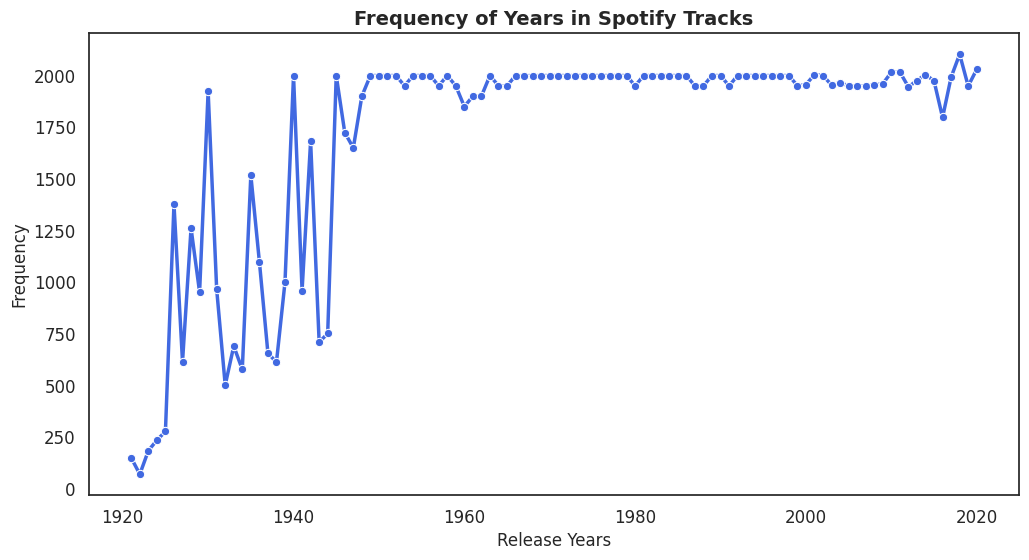

In [149]:
## Taking a look at frequency of years

# Count occurrences of each year and sort
year_counts = df['year'].value_counts().sort_index()

# Set seaborn style
sns.set_style("white")

# Create figure and axis
plt.figure(figsize=(12, 6))

# Plot line chart with styling
sns.lineplot(x=year_counts.index, y=year_counts.values, marker="o", linewidth=2.5, color="royalblue")

# Customize labels and title
plt.title("Frequency of Years in Spotify Tracks", fontsize=14, fontweight='bold')
plt.xlabel("Release Years", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Add grid and show plot
#plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [150]:
df_subset = df[df['year'].isin(range(1750, 2021))]
df_subset.shape[0]/df.shape[0]

1.0

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(0, -10.0, '−10'),
  Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70')])

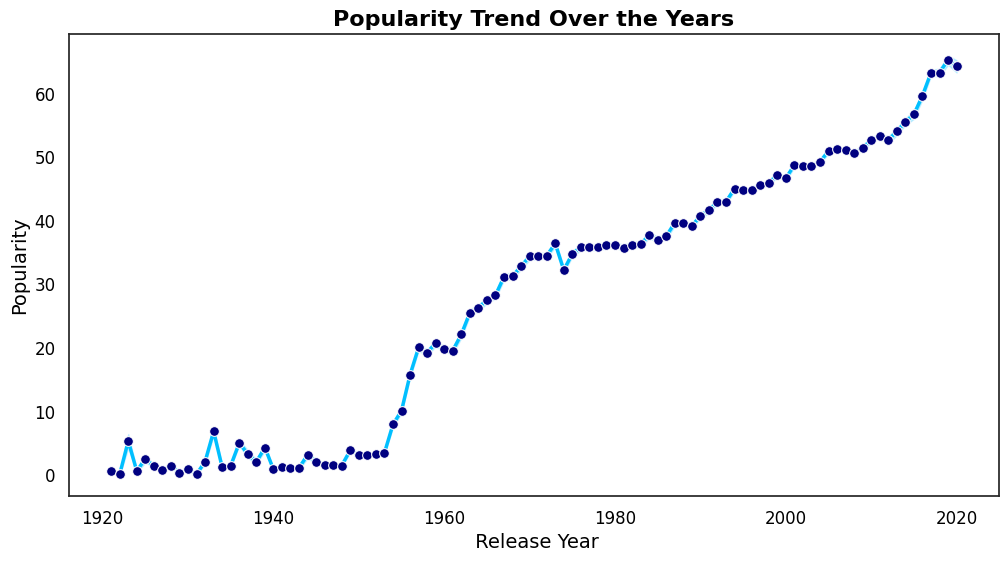

In [151]:
# Set theme with dark background grid
sns.set_theme(style="white")

# Create figure
plt.figure(figsize=(12, 6))

# Plot the line with blue-themed enhancements
sns.lineplot(x="year", y="popularity", data=df, color="deepskyblue", linewidth=2.5, marker="o", markersize=7, markerfacecolor="navy", markeredgecolor="white")

# Customize title and labels with lighter text
plt.title("Popularity Trend Over the Years", fontsize=16, fontweight='bold', color="black")
plt.xlabel(" Release Year", fontsize=14, color="black")
plt.ylabel("Popularity", fontsize=14, color="black")

# Customize x and y ticks
plt.xticks(fontsize=12, color="black")
plt.yticks(fontsize=12, color="black")

# Add grid for readability
#plt.grid(True, linestyle="--", alpha=0.5)

In [152]:
'''#Histogram of Year by population of each genre

genres = ['Jazz / Blues', 'Hip-Hop / R&B', 'Pop / Rock', 'Pop',
       'Fast Rock / Metal', 'EDM / Dance', 'House', 'Ballad / Classical',
       'Techno / Trance', 'Ambient', 'Drum & Bass / Hardstyle']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))  # 4x3 grid (extra subplot left blank)
axes = axes.flatten()

for i, genre in enumerate(genres):
    axes[i].hist(df['year'], weights=df[genre], bins=range(int(df['year'].min()), int(df['year'].max())+1), edgecolor='black')
    axes[i].set_title(genre)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Count')'''



"#Histogram of Year by population of each genre\n\ngenres = ['Jazz / Blues', 'Hip-Hop / R&B', 'Pop / Rock', 'Pop',\n       'Fast Rock / Metal', 'EDM / Dance', 'House', 'Ballad / Classical',\n       'Techno / Trance', 'Ambient', 'Drum & Bass / Hardstyle']\n\nfig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))  # 4x3 grid (extra subplot left blank)\naxes = axes.flatten()\n\nfor i, genre in enumerate(genres):\n    axes[i].hist(df['year'], weights=df[genre], bins=range(int(df['year'].min()), int(df['year'].max())+1), edgecolor='black')\n    axes[i].set_title(genre)\n    axes[i].set_xlabel('Year')\n    axes[i].set_ylabel('Count')"

In [153]:
'''#Histogram of Year by population of each genre

genres = ['Jazz / Blues', 'Hip-Hop / R&B', 'Pop / Rock', 'Pop',
       'Fast Rock / Metal', 'EDM / Dance', 'House', 'Ballad / Classical',
       'Techno / Trance', 'Ambient', 'Drum & Bass / Hardstyle']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))  # 4x3 grid (extra subplot left blank)
axes = axes.flatten()

for i, genre in enumerate(genres):
    axes[i].bar(df['year'],df['popularity'], edgecolor='black')
    axes[i].set_title(genre)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Count')'''

"#Histogram of Year by population of each genre\n\ngenres = ['Jazz / Blues', 'Hip-Hop / R&B', 'Pop / Rock', 'Pop',\n       'Fast Rock / Metal', 'EDM / Dance', 'House', 'Ballad / Classical',\n       'Techno / Trance', 'Ambient', 'Drum & Bass / Hardstyle']\n\nfig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))  # 4x3 grid (extra subplot left blank)\naxes = axes.flatten()\n\nfor i, genre in enumerate(genres):\n    axes[i].bar(df['year'],df['popularity'], edgecolor='black')\n    axes[i].set_title(genre)\n    axes[i].set_xlabel('Year')\n    axes[i].set_ylabel('Count')"

In [154]:
# No longer need the genre column, so I'm droping it
#df = df.drop(columns='genre')

<ipython-input-155-45c47f2aab1c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_mean_popularity.index, y=genre_mean_popularity.values, palette="icefire")


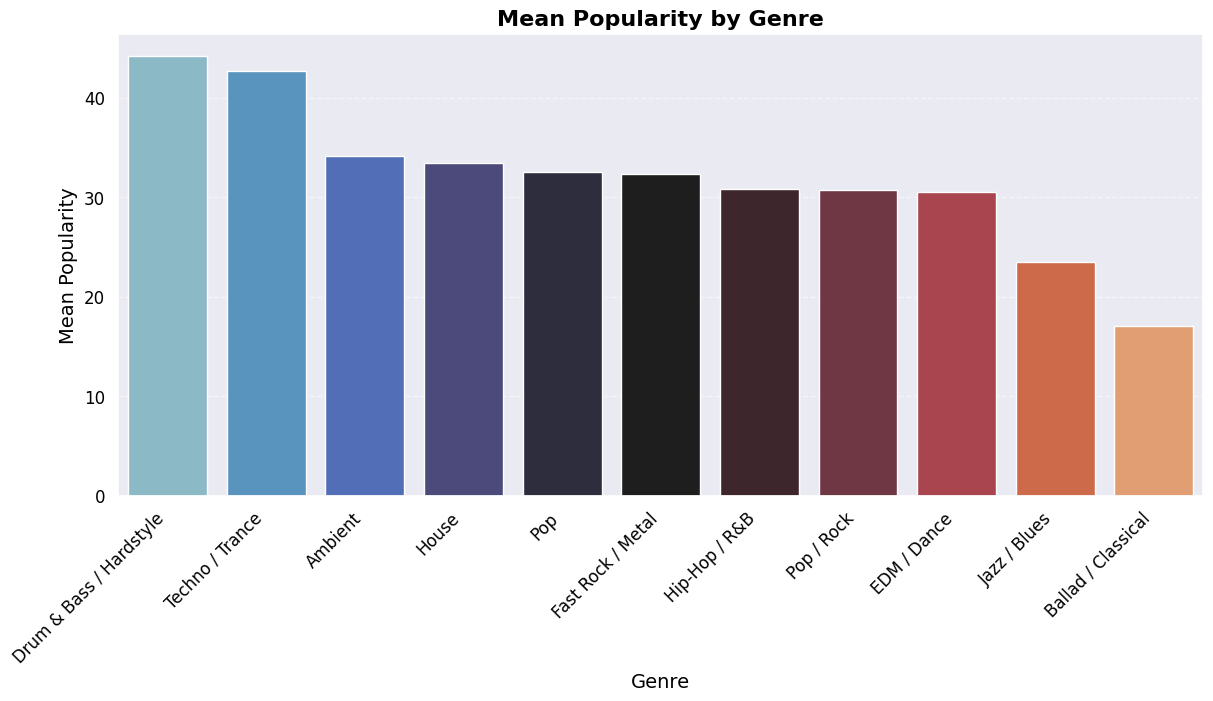

In [155]:
# Mean popularity by genre
# Set theme
sns.set_theme(style="darkgrid")

# Calculate mean popularity for each genre
genre_mean_popularity = df.groupby("genre")["popularity"].mean().sort_values(ascending=False)

# Create figure
plt.figure(figsize=(14, 6))

# Plot bar chart
sns.barplot(x=genre_mean_popularity.index, y=genre_mean_popularity.values, palette="icefire")

# Customize title and labels
plt.title("Mean Popularity by Genre", fontsize=16, fontweight='bold', color="black")
plt.xlabel("Genre", fontsize=14, color="black")
plt.ylabel("Mean Popularity", fontsize=14, color="black")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha="right", fontsize=12, color="black")
plt.yticks(fontsize=12, color="black")

# Add grid for readability
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show plot
plt.show()

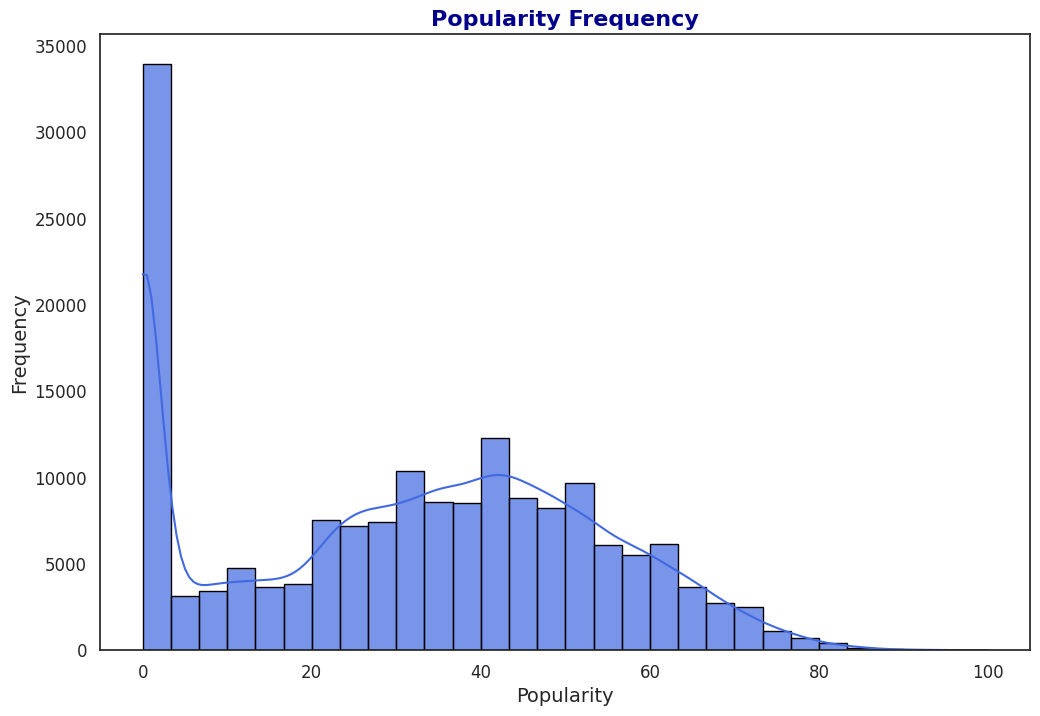

In [156]:
#frequency of popularity
sns.set_style("white")

# Create figure
plt.figure(figsize=(12, 8))

# Plot histogram with aesthetic enhancements
sns.histplot(df['popularity'], bins=30, kde=True, color="royalblue", edgecolor="black", alpha=0.7)

# Customize title and labels
plt.title("Popularity Frequency", fontsize=16, fontweight='bold', color="darkblue")
plt.xlabel("Popularity", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid for readability
#plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.show()

In [157]:
## popularity at a glance
print(df['popularity'].mean())
print(df['popularity'].median())
print(df['popularity'].median())
print(df['popularity'].max())
df['popularity'].describe()

31.431794342906365
33.0
33.0
100


,popularity
count,170653.000000
mean,31.431794
std,21.826615
min,0.000000
25%,11.000000
50%,33.000000
75%,48.000000
max,100.000000


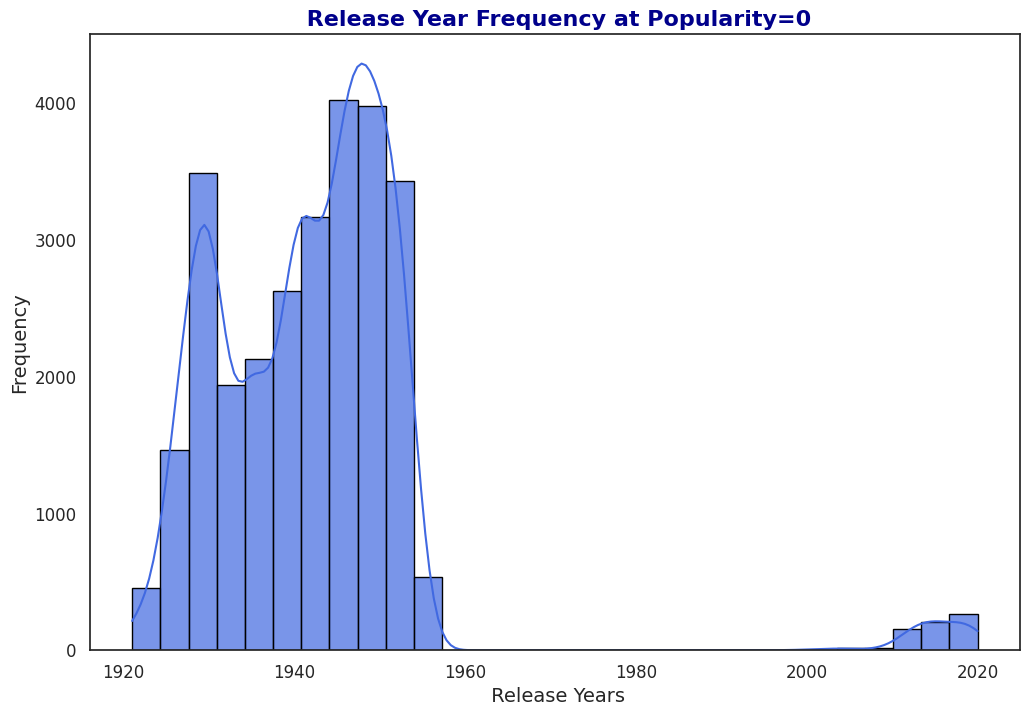

In [158]:
df_zero_pop = df[df['popularity']==0]

#frequency of popularity
sns.set_style("white")

# Create figure
plt.figure(figsize=(12, 8))

# Plot histogram with aesthetic enhancements
sns.histplot(df_zero_pop['year'], bins=30, kde=True, color="royalblue", edgecolor="black", alpha=0.7)

# Customize title and labels
plt.title(" Release Year Frequency at Popularity=0", fontsize=16, fontweight='bold', color="darkblue")
plt.xlabel(" Release Years", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Add grid for readability
#plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.show()

In [159]:
'''## size of popularity 0 df
df_21_60= df[df['year']<=1975]
df_21_60.shape[0]/df.shape[0]
#df_subset = df[df['year'].isin(range(2008, 2021))]
#df_subset.shape[0]/df.shape[0]

df_zero_2000 = df_zero_pop[df_zero_pop['year']>2000]
# genre frequency at pop zero
sns.set_style("whitegrid")

# Count occurrences of each genre
genre_counts = df_zero_2000['genre'].value_counts()

# Create figure
plt.figure(figsize=(14, 6))

# Plot bar chart with aesthetic enhancements
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="coolwarm")

# Customize title and labels
plt.title("Genre Distribution for Zero Popularity Tracks", fontsize=16, fontweight='bold', color="darkblue")
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)


# Add grid for readability
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.show()'''

'## size of popularity 0 df\ndf_21_60= df[df[\'year\']<=1975]\ndf_21_60.shape[0]/df.shape[0]\n#df_subset = df[df[\'year\'].isin(range(2008, 2021))]\n#df_subset.shape[0]/df.shape[0]\n\ndf_zero_2000 = df_zero_pop[df_zero_pop[\'year\']>2000]\n# genre frequency at pop zero\nsns.set_style("whitegrid")\n\n# Count occurrences of each genre\ngenre_counts = df_zero_2000[\'genre\'].value_counts()\n\n# Create figure\nplt.figure(figsize=(14, 6))\n\n# Plot bar chart with aesthetic enhancements\nsns.barplot(x=genre_counts.index, y=genre_counts.values, palette="coolwarm")\n\n# Customize title and labels\nplt.title("Genre Distribution for Zero Popularity Tracks", fontsize=16, fontweight=\'bold\', color="darkblue")\nplt.xlabel("Genre", fontsize=14)\nplt.ylabel("Count", fontsize=14)\n\n# Rotate x-axis labels for better visibility\nplt.xticks(rotation=45, ha="right", fontsize=12)\nplt.yticks(fontsize=12)\n\n\n# Add grid for readability\nplt.grid(axis="y", linestyle="--", alpha=0.6)\n\n# Show plot\nplt.sh

<ipython-input-160-3f7ea4e55525>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="coolwarm")


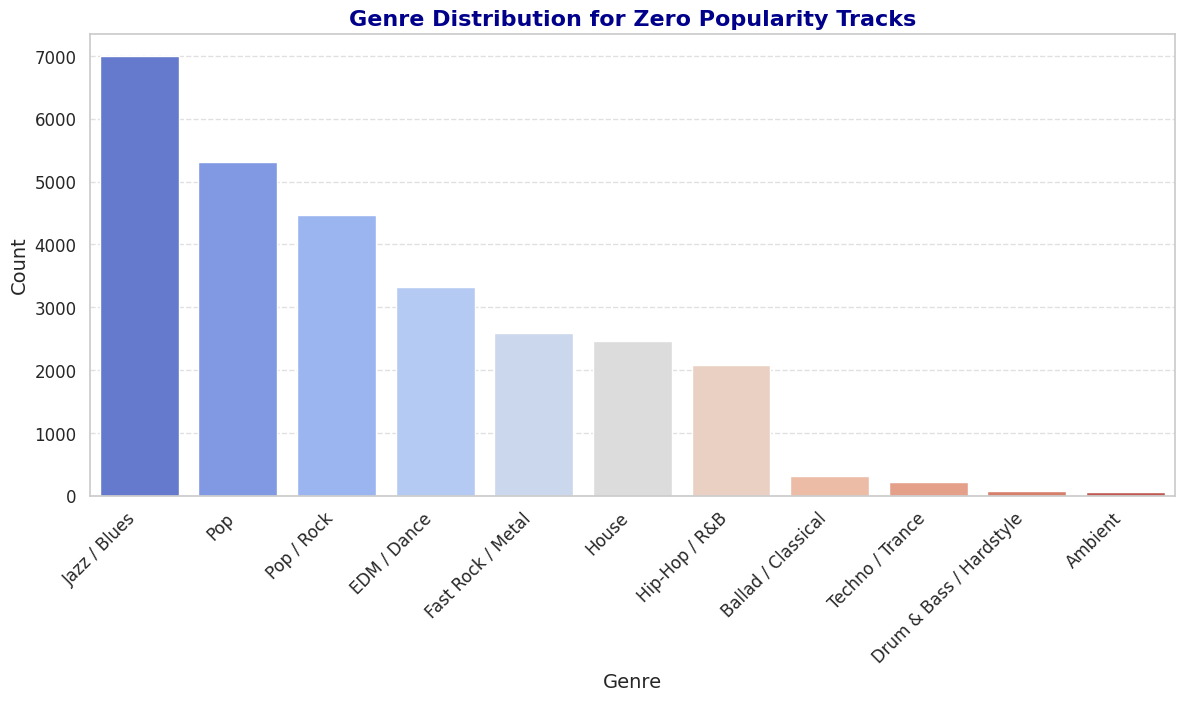

In [160]:
# genre frequency at pop zero
sns.set_style("whitegrid")

# Count occurrences of each genre
genre_counts = df_zero_pop['genre'].value_counts()

# Create figure
plt.figure(figsize=(14, 6))

# Plot bar chart with aesthetic enhancements
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="coolwarm")

# Customize title and labels
plt.title("Genre Distribution for Zero Popularity Tracks", fontsize=16, fontweight='bold', color="darkblue")
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)


# Add grid for readability
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.show()

In [161]:
## lenght of most frequent genre at popularity zero
df_zero_pop[df_zero_pop['genre']=='Jazz / Blues'].shape[0]/df[df['genre']=='Jazz / Blues'].shape[0]
df_zero_pop[df_zero_pop['genre']=='Pop'].shape[0]/df[df['genre']=='Pop'].shape[0]
df_zero_pop[df_zero_pop['genre']=='Pop / Rock'].shape[0]/df[df['genre']=='Pop / Rock'].shape[0]

0.14917237920080254

In [162]:
##scales all numerical data
scaleStandard= StandardScaler()


cols_to_standarize=['valence', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness','mode', 'speechiness', 'tempo']

#fit and transform
standarized_cols = scaleStandard.fit_transform(df[cols_to_standarize])

#creating df with scaled data
scaled_df = pd.DataFrame(standarized_cols, columns=cols_to_standarize)

#adding popularity and encodced genre back to the scaled df
scaled_df['popularity']= df['popularity']
scaled_df['year']= df['release_date'].dt.year


#Adding the columns to the scaled_df
scaled_df['Ambient']= df['Ambient']
scaled_df['Ballad / Classical']= df['Ballad / Classical']
scaled_df['Drum & Bass / Hardstyle']= df['Drum & Bass / Hardstyle']
scaled_df['EDM / Dance']= df['EDM / Dance']
scaled_df['Fast Rock / Metal']= df['Fast Rock / Metal']
scaled_df['Hip-Hop / R&B']= df['Hip-Hop / R&B']
scaled_df['House']= df['House']
scaled_df['Jazz / Blues']= df['Jazz / Blues']
scaled_df['Pop']= df['Pop']
scaled_df['Pop / Rock']= df['Pop / Rock']
scaled_df['Techno / Trance']= df['Techno / Trance']
#Adding artists and name to scaled_df
scaled_df['artists']=df['artists']
scaled_df['name']= df['name']

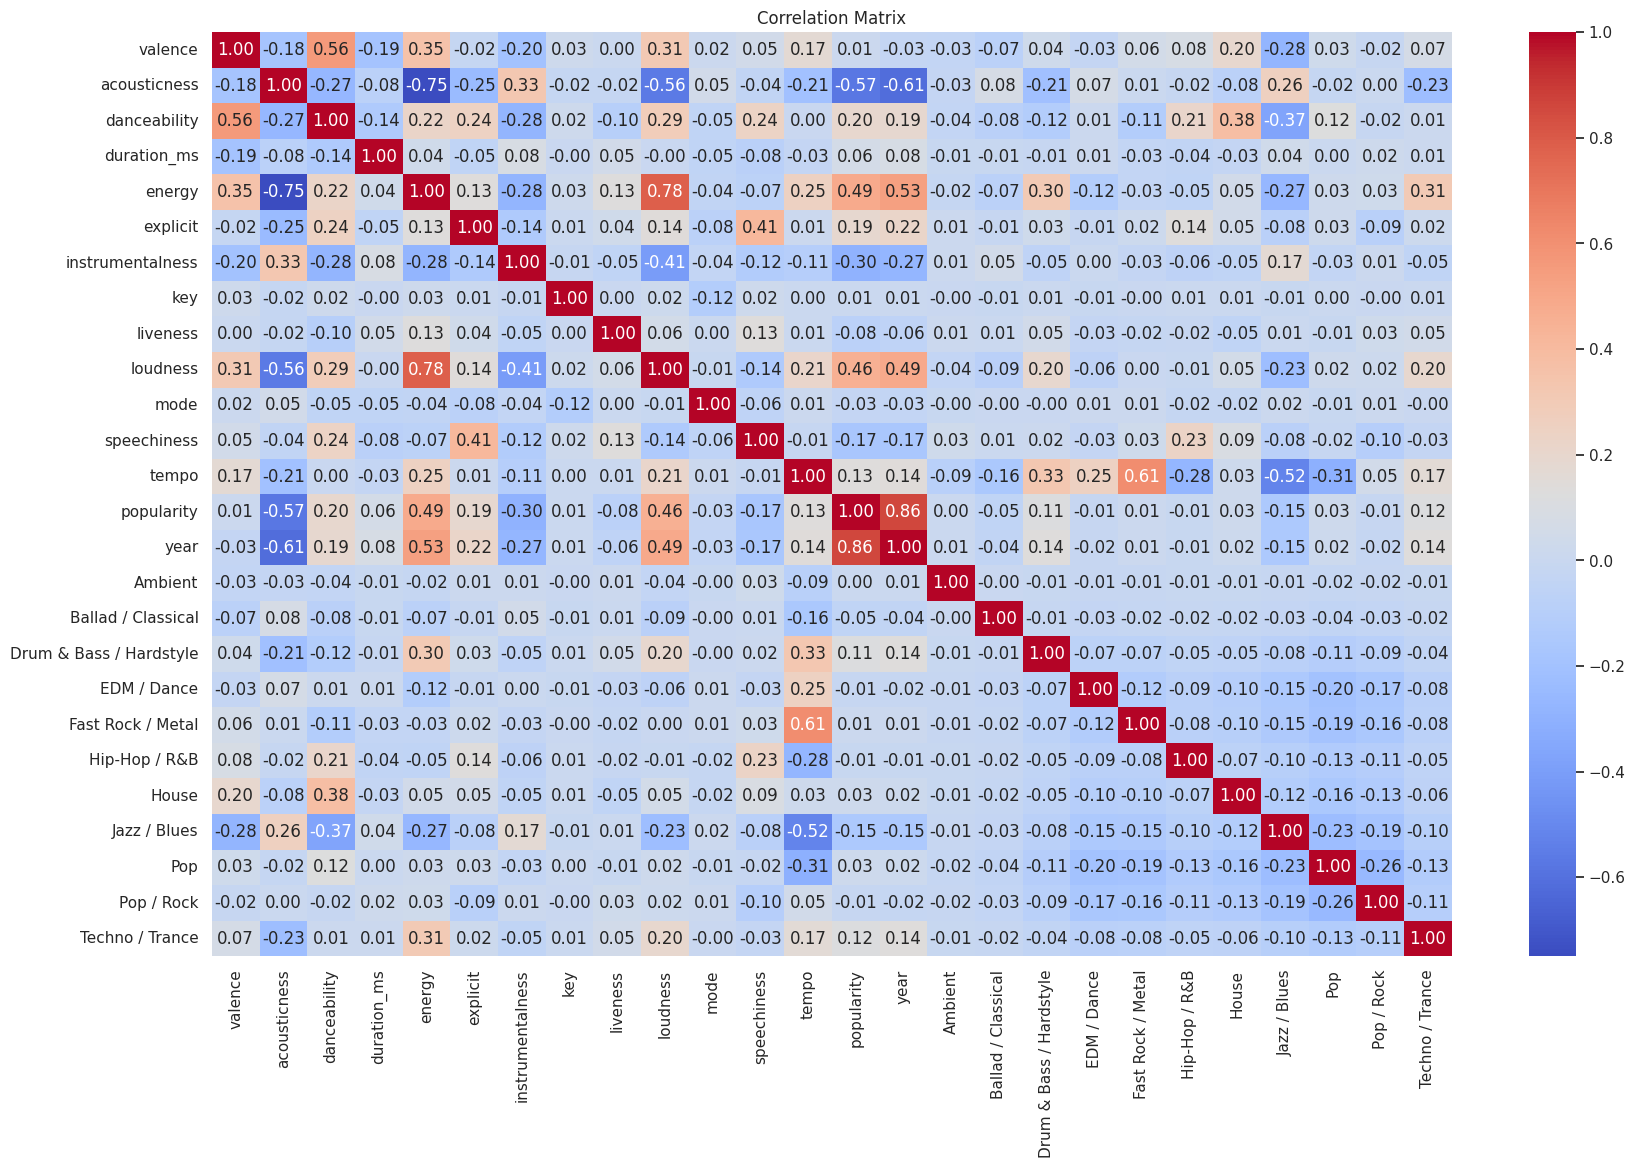

In [163]:
# Calculate the correlation matrix between numerical columns
corr_matrix = scaled_df.drop(columns=['name','artists']).corr()
#plot corr matrix
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# MODELING

8.047222841358964


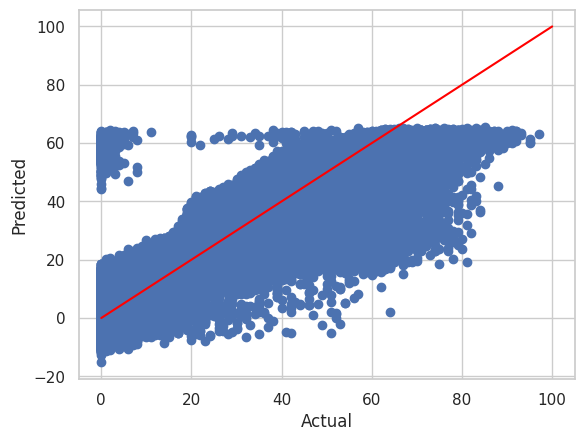

In [164]:
##NEEDS TO BE REBALANCED, Linear regression
##instanciating the model
lr = LinearRegression()
#splitting
df_train, df_test = train_test_split(scaled_df, test_size=0.2)
df_validate, df_train= train_test_split(df_train, test_size=0.5)
## train
X = df_train.drop(columns = ['popularity','artists','name'])
y= df_train[['popularity']]
##validate
X_validate = df_validate.drop(columns = ['popularity','artists','name'])

##fit
lr.fit(X,y)
## predict on validation
df_validate['pop_preds']= lr.predict(X_validate)

#mean absolute error
print(mean_absolute_error(df_validate['popularity'], df_validate['pop_preds']))

#plotting
plt.scatter(df_validate['popularity'], df_validate['pop_preds'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([0,100], [0,100], color='red')

### Modeling with a 3 bin split

In [165]:
##cut into 3 bins 0-29, 30-49, and 50-100
# Define bins and labels
bins = [0, 29, 49, 100]  # Bin edges
labels = ['Low', 'Medium', 'High']  # Bin labels

# Apply binning
scaled_df['popularity_category'] = pd.cut(scaled_df['popularity'], bins=bins, labels=labels, include_lowest=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

0.36859993261159374


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6304239547625325


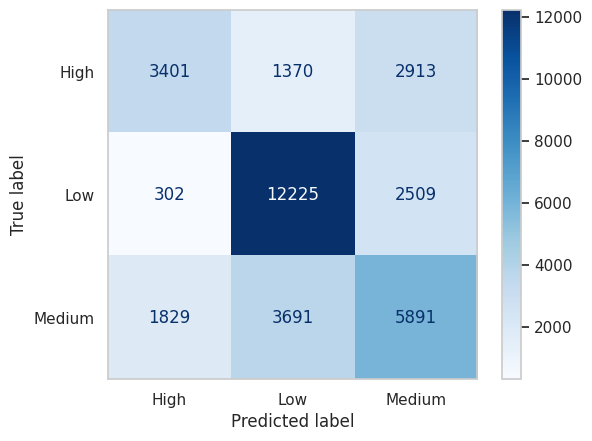

In [166]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(max_iter=400)

#Train. test, validation split
df_train_lg, df_test_lg = train_test_split(scaled_df, test_size=0.2, random_state=40)
df_validate_lg, df_train_lg= train_test_split(df_train_lg, test_size=0.5, random_state=40)

## Train X,y
X_lg = df_train_lg.drop(columns = ['popularity', 'popularity_category','artists','name'])
y_lg= df_train_lg[['popularity_category']]

##Validation X,y
X_validate_lg = df_validate_lg.drop(columns = ['popularity', 'popularity_category','artists','name'])
y_validate_lg= df_validate_lg['popularity_category']

#Fit on Train X,y
model.fit(X_lg,y_lg)

#Predict on X Validation
df_validate_lg['popularity_category_preds']= model.predict(X_validate)

#Accuracy y and preds validation
accuracy = accuracy_score(y_validate_lg, df_validate_lg['popularity_category_preds'])
print(accuracy)

#Testing X,y
X_test_lg = df_test_lg.drop(columns = ['popularity', 'popularity_category','artists','name'] )
y_test_lg = df_test_lg[['popularity_category']]

#Fit
model.fit(X_test_lg,y_test_lg)

#Prediction on testing X
df_test_lg['popularity_category_preds']= model.predict(X_test_lg)

#Accuracy
accuracy = accuracy_score(y_test_lg, df_test_lg['popularity_category_preds'])
print(accuracy)

#Confusion Matrix on y and preds validation
cm_kmeans = confusion_matrix(y_test_lg, df_test_lg['popularity_category_preds'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_kmeans, display_labels=model.classes_)

disp.plot(cmap='Blues')
plt.grid(False)
plt.show()

0.35430187076075653
0.6711200961003193


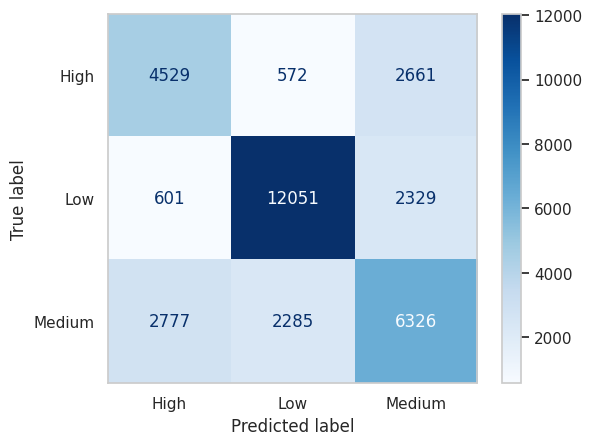

In [167]:
## decision tree classifier with 3 bins low, medium and high popularity
from sklearn.tree import DecisionTreeClassifier
clf =DecisionTreeClassifier(splitter='best', random_state=100)


#Splitting into train, test and validation sets
df_train_clf, df_test_clf = train_test_split(scaled_df, test_size=0.2, random_state=100)
df_validate_clf, df_train_clf= train_test_split(df_train_clf, test_size=0.5, random_state=100)

## Train X,Y
X_clf = df_train_clf.drop(columns = ['popularity', 'popularity_category','artists','name'])
y_clf= df_train_clf[['popularity_category']]

##vValidation X,Y
X_validate_clf = df_validate_clf.drop(columns = ['popularity', 'popularity_category','artists','name'])
y_validate_clf= df_train_clf[['popularity_category']]

#Fit on Training X,Y
clf.fit(X_clf,y_clf)

#Predict on Validation X
df_validate_clf['popularity_category_preds']= clf.predict(X_validate_clf)

#Accuracy on Validation Y and preds
accuracy = accuracy_score(y_validate_clf, df_validate_clf['popularity_category_preds'])
print(accuracy)

## test X, Y
X_clf_test = df_test_clf.drop(columns = ['popularity', 'popularity_category','artists','name'])
y_clf_test= df_test_clf[['popularity_category']]

#Predict on test, X
df_test_clf['popularity_category_preds']= clf.predict(X_clf_test)

#Accuracy on Testing Y and preds
accuracy_test = accuracy_score(y_clf_test, df_test_clf['popularity_category_preds'])
print(accuracy_test)

#Matrix on Testing Y and preds
cm_clf_kmeans3 = confusion_matrix(y_clf_test, df_test_clf['popularity_category_preds'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_clf_kmeans3, display_labels=clf.classes_)

disp.plot(cmap='Blues')
plt.grid(False)
plt.show()

0.35636747190928936
0.5512290879259324


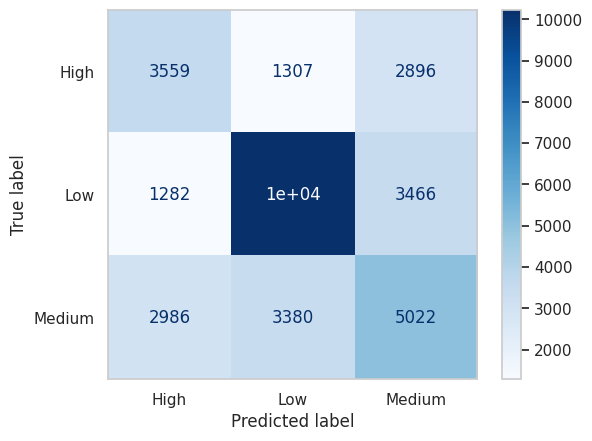

In [168]:
## decision tree classifier with 3 bins low, medium and high popularity (w/oyear)
from sklearn.tree import DecisionTreeClassifier
clf_no_year =DecisionTreeClassifier(splitter='best', random_state=100)


#Splitting into train, test and validation sets
df_train_clf_no_year, df_test_clf_no_year = train_test_split(scaled_df, test_size=0.2, random_state=100)
df_validate_clf_no_year, df_train_clf_no_year= train_test_split(df_train_clf_no_year, test_size=0.5, random_state=100)

## Train X,Y
X_clf_no_year = df_train_clf_no_year.drop(columns = ['popularity', 'popularity_category', 'year','artists','name'])
y_clf_no_year= df_train_clf_no_year[['popularity_category']]

##vValidation X,Y
X_validate_clf_no_year = df_validate_clf_no_year.drop(columns = ['popularity', 'popularity_category', 'year','artists','name'])
y_validate_clf_no_year= df_train_clf_no_year[['popularity_category']]

#Fit on Training X,Y
clf_no_year.fit(X_clf_no_year,y_clf_no_year)

#Predict on Validation X
df_validate_clf_no_year['popularity_category_preds']= clf_no_year.predict(X_validate_clf_no_year)

#Accuracy on Validation Y and preds
accuracy = accuracy_score(y_validate_clf_no_year, df_validate_clf_no_year['popularity_category_preds'])
print(accuracy)

## test X, Y
X_clf_no_year_test = df_test_clf_no_year.drop(columns = ['popularity', 'popularity_category', 'year','artists','name'])
y_clf_no_year_test= df_test_clf_no_year[['popularity_category']]

#Predict on test, X
df_test_clf_no_year['popularity_category_preds']= clf_no_year.predict(X_clf_no_year_test)

#Accuracy on Testing Y and preds
accuracy_test = accuracy_score(y_clf_no_year_test, df_test_clf_no_year['popularity_category_preds'])
print(accuracy_test)

#Matrix on Testing Y and preds
cm_clf_kmeans3 = confusion_matrix(y_clf_no_year_test, df_test_clf_no_year['popularity_category_preds'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_clf_kmeans3, display_labels=clf_no_year.classes_)

disp.plot(cmap='Blues')
plt.grid(False)
plt.show()

Modeling with 2 Bins 0-30, 50-100 using kmeans
# TO DO: Run Models w/year, upload to presentation

In [169]:
## splitting into 2 bins popular and not popular


# Initialize KBinsDiscretizer with custom bins using 'explicit' strategy
kbins = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='kmeans')

# Fit and transform the data
scaled_df['popularity_cat_kmeans_2'] = kbins.fit_transform(scaled_df[['popularity']]).astype(int)

# Map numeric bins to labels
category_mapping = {0: 'Not Popular', 1: 'Popular'}
scaled_df['popularity_cat_kmeans_2'] = scaled_df['popularity_cat_kmeans_2'].map(category_mapping)


## checking for min and max in each label
not_pop_df= scaled_df[scaled_df['popularity_cat_kmeans_2']=="Not Popular"]
print(f"low pop has min of: {not_pop_df['popularity'].min()}")
print(f"low pop has max of: {not_pop_df['popularity'].max()}")

pop_df= scaled_df[scaled_df['popularity_cat_kmeans_2']=="Popular"]
print(f"medium pop has min of: {pop_df['popularity'].min()}")
print(f"medium pop has max of: {pop_df['popularity'].max()}")

not_pop_df['popularity'].shape
pop_df['popularity'].shape

low pop has min of: 0
low pop has max of: 29
medium pop has min of: 30
medium pop has max of: 100


(95610,)

0.5091340589795051
0.8219507192874513


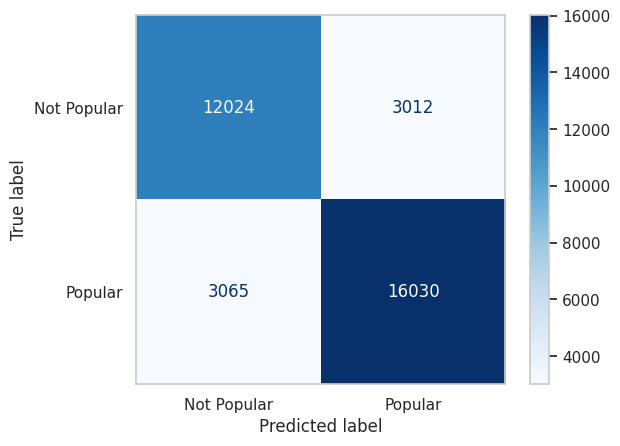

In [170]:
## decision tree classifier 2 bins as kmeans dicretizer
clf_2=DecisionTreeClassifier(splitter='random', random_state=100 )


#Initial split
df_train_clf2, df_test_clf_2 = train_test_split(scaled_df, test_size=0.2, random_state=40)
df_validate_clf_2, df_train_clf_2= train_test_split(df_train_clf2, test_size=0.5, random_state=40)

## train and validate split
X_clf_2 = df_train_clf_2.drop(columns = ['popularity','popularity_cat_kmeans_2','popularity_category','artists','name'])
y_clf_2= df_train_clf_2[['popularity_cat_kmeans_2']]

##validate
X_validate_clf2 = df_validate_clf_2.drop(columns = ['popularity', 'popularity_cat_kmeans_2','popularity_category','artists','name'])
y_validate_clf_2= df_train_clf_2[['popularity_cat_kmeans_2']]
#fit
clf_2.fit(X_clf_2,y_clf_2)

#predict on trainin data set
df_validate_clf_2['clf_preds_kmeans_2']= clf_2.predict(X_validate_clf2)

#Accuracy
accuracy = accuracy_score(y_validate_clf_2, df_validate_clf_2['clf_preds_kmeans_2'])
print(accuracy)

## test
X_clf_test2 = df_test_clf_2.drop(columns = ['popularity', 'popularity_cat_kmeans_2','popularity_category','artists','name'])
y_clf_test2= df_test_clf_2[['popularity_cat_kmeans_2']]

##predict on testing df
df_test_clf_2['clf_preds_kmeans_2']= clf_2.predict(X_clf_test2)

accuracy_test = accuracy_score(y_clf_test2, df_test_clf_2['clf_preds_kmeans_2'])
print(accuracy_test)

#confusion matrix
cm_kmeans_2 = confusion_matrix(y_clf_test2, df_test_clf_2['clf_preds_kmeans_2'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_kmeans_2, display_labels=clf_2.classes_ )


disp.plot(cmap='Blues')
plt.grid(False)


plt.show()

0.5101155857663966
0.7167677477952594


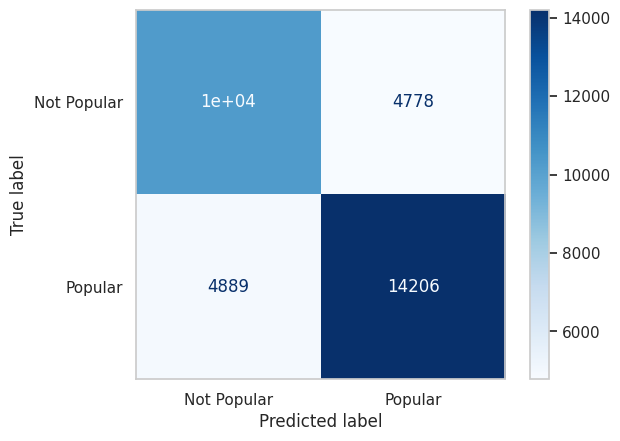

In [171]:
## decision tree classifier 2 bins as kmeans dicretizer w/o year
clf_2_no_year=DecisionTreeClassifier(splitter='random', random_state=100 )


#Initial split
df_train_clf_no_year2, df_test_clf2_no_year = train_test_split(scaled_df, test_size=0.2, random_state=40)
df_validate_clf_no_year2, df_train_clf_no_year2= train_test_split(df_train_clf_no_year2, test_size=0.5, random_state=40)

## train and validate split,
X_clf_no_year2 = df_train_clf_no_year2.drop(columns = ['popularity','popularity_cat_kmeans_2','popularity_category','artists','name','year'])
y_clf_no_year2= df_train_clf_no_year2[['popularity_cat_kmeans_2']]

##validate
X_validate_clf2_no_year = df_validate_clf_no_year2.drop(columns = ['popularity', 'popularity_cat_kmeans_2','popularity_category','artists','name','year'])
y_validate_clf_no_year2= df_train_clf_no_year2[['popularity_cat_kmeans_2']]
#fit
clf_2_no_year.fit(X_clf_no_year2,y_clf_no_year2)

#predict on trainin data set
df_validate_clf_no_year2['clf_preds_kmeans_2']= clf_2_no_year.predict(X_validate_clf2_no_year)

#Accuracy
accuracy = accuracy_score(y_validate_clf_no_year2, df_validate_clf_no_year2['clf_preds_kmeans_2'])
print(accuracy)

## test
X_clf2_no_year_test = df_test_clf2_no_year.drop(columns = ['popularity', 'popularity_cat_kmeans_2','popularity_category','artists','name','year'])
y_clf2_no_year_test= df_test_clf2_no_year[['popularity_cat_kmeans_2']]

##predict on testing df
df_test_clf2_no_year['clf_preds_kmeans_2']= clf_2_no_year.predict(X_clf2_no_year_test)

accuracy_test = accuracy_score(y_clf2_no_year_test, df_test_clf2_no_year['clf_preds_kmeans_2'])
print(accuracy_test)

#confusion matrix
cm_kmeans_2_no_year = confusion_matrix(y_clf2_no_year_test, df_test_clf2_no_year['clf_preds_kmeans_2'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_kmeans_2_no_year, display_labels=clf_2_no_year.classes_ )

disp.plot(cmap='Blues')
plt.grid(False)
plt.show()

In [172]:
'''import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)  # Adjust max_depth for clarity
clf.fit(X_train, y_train)

# Create figure
plt.figure(figsize=(12, 6))

# Plot tree with fancy colors
plot_tree(clf, feature_names=X_train.columns, class_names=['Class 0', 'Class 1'], filled=True, rounded=True, fontsize=10)

# Show plot
plt.title("Decision Tree Visualization", fontsize=14, fontweight='bold')'''
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7842545523798362
0.7841551668571094


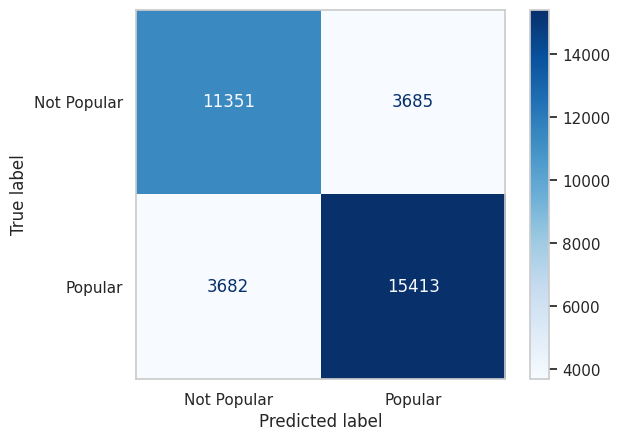

In [173]:
# Logistic Regression 2 bins kmeans
model_3= LogisticRegression()
#Training, Testing, Validation split
df_train_lg3, df_test_lg3 = train_test_split(scaled_df, test_size=0.2, random_state=40)
df_validate_lg3, df_train_lg3= train_test_split(df_train_lg3, test_size=0.5, random_state=40)

## Train X,y
X_lg3 = df_train_lg3.drop(columns = ['popularity','popularity_cat_kmeans_2','popularity_category','artists','name'])
y_lg3= df_train_lg3[['popularity_cat_kmeans_2']]

##Validation X,y
X_validate_lg3 = df_validate_lg3.drop(columns = ['popularity','popularity_cat_kmeans_2','popularity_category','artists','name'])
y_validate_lg3= df_validate_lg3[['popularity_cat_kmeans_2']]

##testing X,Y
X_test_lg3 = df_test_lg3.drop(columns = ['popularity','popularity_cat_kmeans_2','popularity_category','artists','name'])
y_test_lg3= df_test_lg3[['popularity_cat_kmeans_2']]

#Fit on gtraining X,y
model_3.fit(X_lg3,y_lg3)

#Predict on X,y
df_validate_lg3['popularity_preds_lg_kmeans_2']= model_3.predict(X_validate_lg3)

#Accuracy on Validation y and preds
accuracy = accuracy_score(y_validate_lg3, df_validate_lg3['popularity_preds_lg_kmeans_2'])
print(accuracy)

#Predict on testing y and preds
df_test_lg3['popularity_preds_lg_kmeans_2']= model_3.predict(X_test_lg3)

#Accuracy on testing y and preds
accuracy = accuracy_score(y_test_lg3, df_test_lg3['popularity_preds_lg_kmeans_2'])
print(accuracy)

#Accuracy matrix on testing y and preds
cm_lgR_kmeans_2= confusion_matrix(y_test_lg3, df_test_lg3['popularity_preds_lg_kmeans_2'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lgR_kmeans_2, display_labels=model_3.classes_)



disp.plot(cmap='Blues')
plt.grid(False)
plt.show()

In [174]:
from sklearn.metrics import recall_score, f1_score
#Scoring for Logitic REgression Model 2 bins
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test_lg3)
y_pred_encoded = le.transform(df_test_lg3['popularity_preds_lg_kmeans_2'])

# Compute precision
precision = precision_score(y_test_encoded, y_pred_encoded)
print(f"{precision:.4f}")

recall = recall_score(y_test_encoded, y_pred_encoded)
print(f"{recall:.4f}")

f1 = f1_score(y_test_encoded, y_pred_encoded)
print(f"{f1:.4f}")

0.8070
0.8072
0.8071


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<ipython-input-175-4fd7e5e96600>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


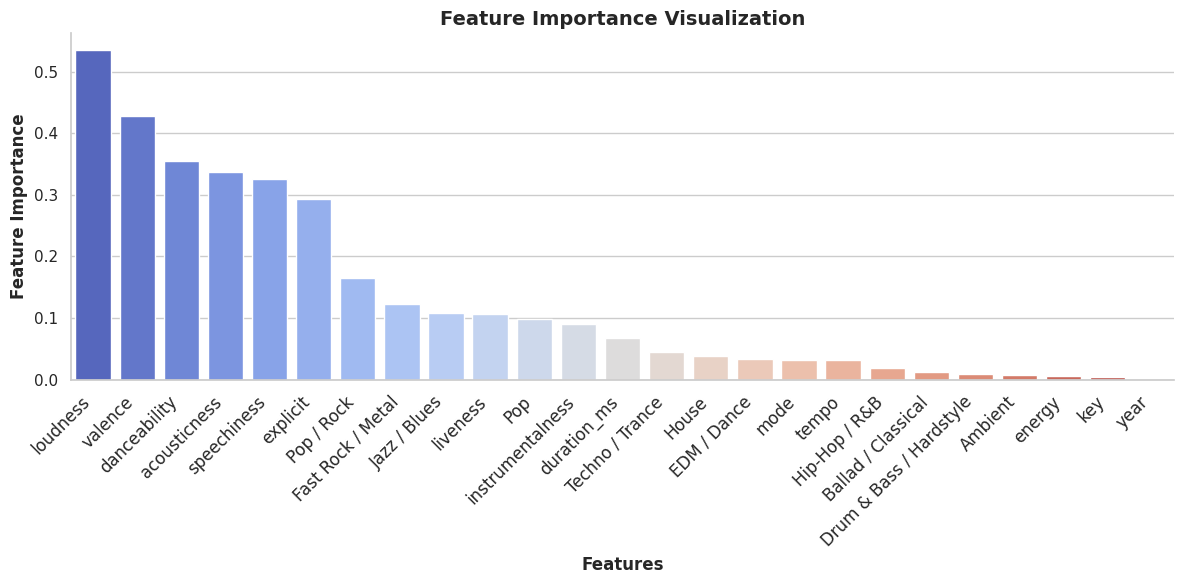

In [175]:
# Assuming model and X_lg3 are already defined
feature_importance = pd.DataFrame({'feature': X_lg3.columns, 'importance': np.abs(model.coef_[0])})

# Sort values
feature_importance.sort_values('importance', ascending=False, inplace=True)

# Set figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create a fancy bar plot
colors = sns.color_palette("coolwarm", len(feature_importance))  # Gradient color palette
sns.barplot(
    x=feature_importance['feature'],
    y=feature_importance['importance'],
    palette=colors
)

# Add labels and titles
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Feature Importance', fontsize=12, fontweight='bold')
plt.title('Feature Importance Visualization', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Remove top and right spines
sns.despine()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7838590117343724
0.7826609240866075


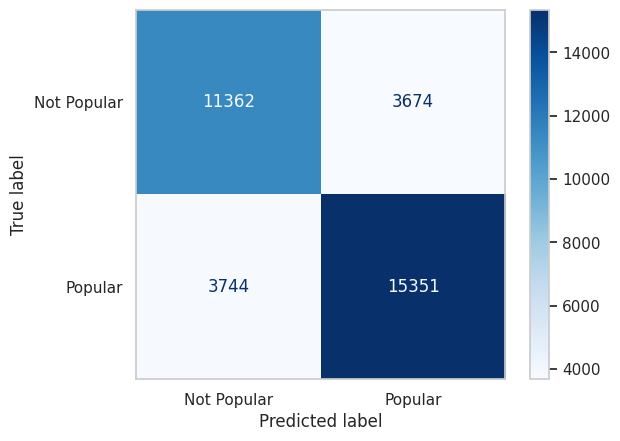

In [176]:
# Logistic Regression 2 bins kmeans,no year
model_4= LogisticRegression()
#Training, Testing, Validation split
df_train_lg4, df_test_lg4 = train_test_split(scaled_df, test_size=0.2, random_state=40)
df_validate_lg4, df_train_lg4= train_test_split(df_train_lg4, test_size=0.5, random_state=40)

## Train X,y
X_lg4 = df_train_lg4.drop(columns = ['popularity','popularity_cat_kmeans_2','popularity_category','artists','name','year'])
y_lg4= df_train_lg4[['popularity_cat_kmeans_2']]

##Validation X,y
X_validate_lg4 = df_validate_lg4.drop(columns = ['popularity','popularity_cat_kmeans_2','popularity_category','artists','name','year'])
y_validate_lg4= df_validate_lg4[['popularity_cat_kmeans_2']]

##testing X,Y
X_test_lg4 = df_test_lg4.drop(columns = ['popularity','popularity_cat_kmeans_2','popularity_category','artists','name','year'])
y_test_lg4= df_test_lg4[['popularity_cat_kmeans_2']]

#Fit on gtraining X,y
model_4.fit(X_lg4,y_lg4)

#Predict on X,y
df_validate_lg4['popularity_preds_lg_kmeans_2']= model_4.predict(X_validate_lg4)

#Accuracy on Validation y and preds
accuracy = accuracy_score(y_validate_lg4, df_validate_lg4['popularity_preds_lg_kmeans_2'])
print(accuracy)

#Predict on testing y and preds
df_test_lg4['popularity_preds_lg_kmeans_2']= model_4.predict(X_test_lg4)

#Accuracy on testing y and preds
accuracy = accuracy_score(y_test_lg4, df_test_lg4['popularity_preds_lg_kmeans_2'])
print(accuracy)

#Accuracy matrix on testing y and preds
cm_lgR_kmeans_2= confusion_matrix(y_test_lg4, df_test_lg4['popularity_preds_lg_kmeans_2'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lgR_kmeans_2, display_labels=model_4.classes_)

disp.plot(cmap='Blues')
plt.grid(False)
plt.show()

MAKE TABLE OF SUGGESTIONS AND OF SUBSET

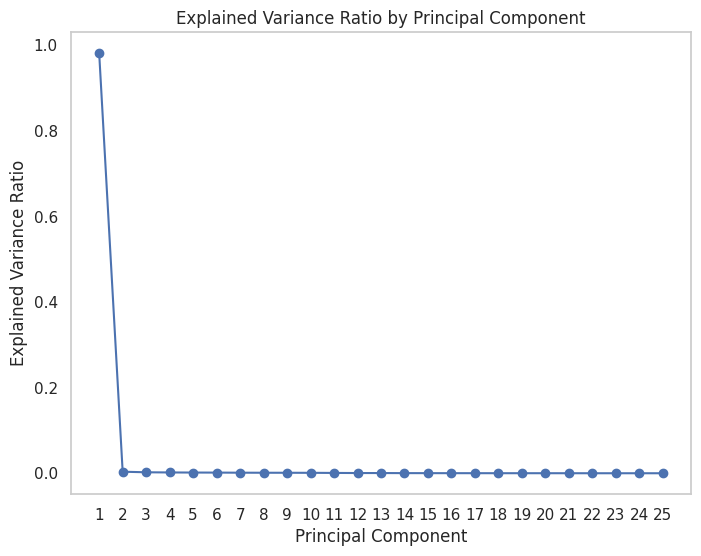

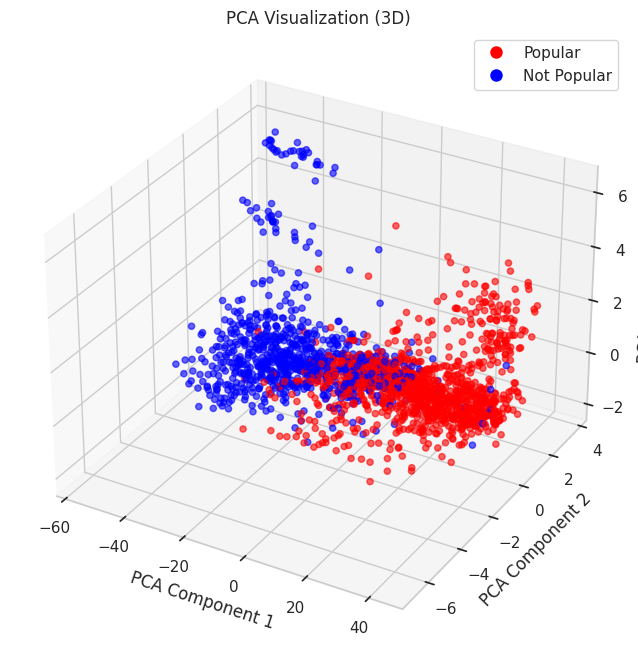

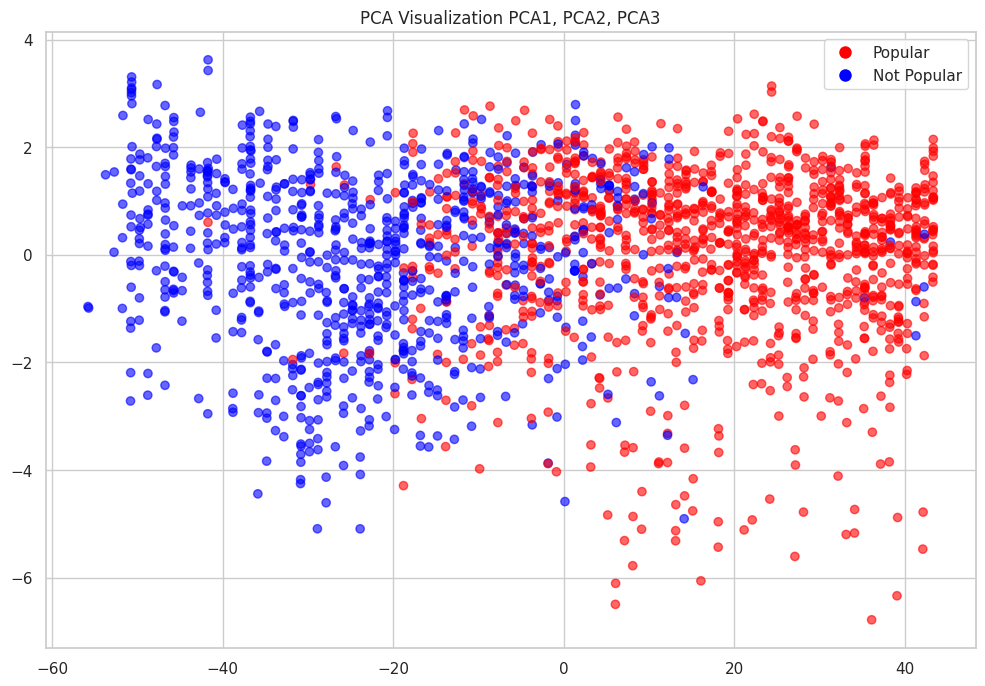

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ... (Your data loading and preprocessing code, including scaling)

# Prepare data (same as your code)
X = scaled_df.sample(n=2000, random_state=42).drop(columns=['artists','name','popularity',
                                            'popularity_category',
                                            'popularity_cat_kmeans_2'])
y = scaled_df.sample(n=2000, random_state=42)['popularity_cat_kmeans_2'].values.flatten()

y_labels = y.flatten()

# Fit KNN model (This is still needed for other analysis, but we won't use the neighbor connections in the plot)
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)
distance, indices = knn.kneighbors(X)  # Keep this if you need it elsewhere

# Reduce dimensions using PCA
pca = PCA()  # Fit PCA without specifying n_components initially
X_pca = pca.fit_transform(X)

# Explained variance ratio (for component selection)
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio by Principal Component")
plt.xticks(range(1, len(explained_variance_ratio) + 1))  # Ensure all component numbers are shown
plt.grid(False)
plt.show()

# Choose the number of components based on the plot (e.g., where the variance plateaus)
n_components = 3  # Set to 3 components

# Refit PCA with the chosen number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)


# ... (rest of your plotting code for KNN and nearest neighbors)

# Define colors for categories
color_map = {'Popular': 'red', 'Not Popular': 'blue'}
y_colors = [color_map[label] for label in y_labels]  # Assign colors based on class

# 3D Plot without connecting lines
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_colors, alpha=0.6)  # 3D scatter plot ONLY

# Labels and legend (adapt for 3D)
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3") # Add z-label
ax.set_title("PCA Visualization (3D)") # Clearer title

# Custom legend
ax.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Popular',
                               markersize=10, markerfacecolor='red'),
                    plt.Line2D([0], [0], marker='o', color='w', label='Not Popular',
                               markersize=10, markerfacecolor='blue')],
           loc="upper right")
# Plot PCA-reduced data
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_colors, alpha=0.6)
plt.title("PCA Visualization PCA1, PCA2, PCA3")
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Popular',
                               markersize=10, markerfacecolor='red'),
                    plt.Line2D([0], [0], marker='o', color='w', label='Not Popular',
                               markersize=10, markerfacecolor='blue')],
           loc="upper right")
plt.show()


In [187]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display, HTML

def get_recommended_songs(X, y, scaled_df, song_index, n_recommendations=5):
    """
    Retrieves recommended songs based on a given song index using a trained KNN model.

    Args:
        X (pd.DataFrame): Scaled feature matrix (without song metadata).
        y (np.ndarray): Target labels (e.g., cluster labels).
        scaled_df (pd.DataFrame): Original scaled DataFrame containing song metadata.
        song_index (int): Index of the song for which to find recommendations.
        n_recommendations (int): Number of recommendations to retrieve.

    Returns:
        pd.DataFrame: DataFrame containing the recommended songs.
    """

    knn = KNeighborsClassifier(n_neighbors=15)
    knn.fit(X, y)
    distance, indices = knn.kneighbors(X)

    # Check if the song_index is valid.
    if song_index >= len(indices):
        print(f"Error: song_index {song_index} is out of bounds for the KNN results.")
        return None

    # Get the indices of the nearest neighbors for the given song
    neighbor_indices = indices[song_index][1:n_recommendations + 1]  # Exclude the song itself

    # Retrieve the recommended songs from the original DataFrame
    recommended_songs = scaled_df.iloc[neighbor_indices]

    return recommended_songs

# Example Usage (assuming you have your X, y, and scaled_df already defined):

# 1. Sample your data
X = scaled_df.sample(n=2000, random_state=42).drop(columns=['artists', 'name',
                                                            'popularity_category',
                                                            'popularity_cat_kmeans_2', 'popularity'])
y = scaled_df.sample(n=2000, random_state=42)['popularity_cat_kmeans_2'].values.flatten()

y_labels = y.flatten()

# 2. Get a specific song index (for example, the first song in your sampled data)
song_index_to_recommend = X.index[0] #first index of X

#3.Find the original index in the scaled_df
original_index = scaled_df.index.get_loc(song_index_to_recommend)

# 4. Find the row location in the sampled data.
sampled_index = X.index.get_loc(song_index_to_recommend)

# 5. Get the recommended songs
recommended_songs_df = get_recommended_songs(X, y, scaled_df, sampled_index, n_recommendations=5)

# 6. Print the recommended songs
if recommended_songs_df is not None:
    print(recommended_songs_df[['name', 'artists']])
    # 6. Print the recommended songs in a table
if recommended_songs_df is not None:
    display(HTML(recommended_songs_df[['name', 'artists','valence','acousticness','danceability','popularity']].to_html(index=False)))

                                                  name  \
1766                                   Variations op.9   
59                                       April Showers   
1130  Hi Diddle, Diddle - Instrumental (Remasterizado)   
1243                Mother's Children Have a Hard Time   
344                               La Valse Du Faubourg   

                                 artists  
1766  ['Fernando Sor', 'Andrés Segovia']  
59             ['Thomas Hallsten Paine']  
1130                ['Francisco Canaro']  
1243            ['Blind Willie Johnson']  
344                      ['Félix Mayol']  


name,artists,valence,acousticness,danceability,popularity
Variations op.9,"['Fernando Sor', 'Andrés Segovia']",-0.378413,1.268209,-1.302368,2
April Showers,['Thomas Hallsten Paine'],-1.123177,0.967701,-1.279659,0
"Hi Diddle, Diddle - Instrumental (Remasterizado)",['Francisco Canaro'],1.646889,1.305440,1.604456,0
Mother's Children Have a Hard Time,['Blind Willie Johnson'],0.016768,1.151197,0.599558,16
La Valse Du Faubourg,['Félix Mayol'],1.540494,1.265549,0.486010,0


In [184]:
##Playlist describe table
playlist_mean =scaled_df.sample(n=2000, random_state=42)[['valence','acousticness','danceability','popularity']].describe()
playlist_mean

,valence,acousticness,danceability,popularity
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,-0.022944,-0.003624,0.004415,31.497500
std,0.999088,1.010587,0.992200,21.580381
min,-2.008534,-1.335299,-3.051005,0.000000
25%,-0.816342,-1.066708,-0.684952,11.000000
50%,0.018668,0.014321,0.065883,34.000000
75%,0.803330,1.063438,0.730138,48.000000
max,1.715285,1.313418,2.410646,92.000000


In [186]:
list(indices)

[array([   0, 1766,   59, 1130, 1243,  344, 1787, 1530, 1332,  354,  920,
        1851, 1468, 1201,  364]),
 array([   1, 1771, 1144,  981, 1170,   53,  316, 1869, 1135,  726, 1619,
        1026, 1851,  831,  581]),
 array([   2,  930, 1019, 1645,  196,  908, 1627, 1641,   15,  685, 1188,
         219,  139,  962, 1895]),
 array([   3,  179,   62, 1256,  809, 1268,  357, 1511, 1355, 1519,  582,
        1507, 1295, 1749,  712]),
 array([   4,  951,  664, 1601,  455, 1745, 1889, 1498, 1371, 1400,  844,
        1882, 1622, 1044, 1753]),
 array([   5, 1145, 1522,  379,  321, 1650,  800,  406,  804, 1743, 1455,
         645,  352, 1741, 1122]),
 array([   6, 1159, 1600,  795,  565, 1311, 1057,  607, 1863,  510,   88,
        1933, 1079,  489, 1179]),
 array([   7, 1133,  948,  175,  883,  724,  447,  446,  897, 1763,  905,
         850, 1331,  479, 1868]),
 array([   8, 1988,  993,   24,  248,  679,  140,  863,  195,   19, 1478,
         711, 1393, 1006, 1283]),
 array([   9,  937,  808, 15

In [ ]:
feature_names = X.columns
print(feature_names)
## valence,acousticness and danceability for PCA1
##danceability weighs more por PCA1 and 2
##PCA3  valence weighs more


In [ ]:
feature_names = X.columns  # Get feature names (if DataFrame)

for i, pc in enumerate(pca.components_):  # Iterate through principal components
    print(f"Principal Component {i+1}:")
    for j, coef in enumerate(pc):  # Iterate through coefficients
        feature_name = feature_names[j]  # Get corresponding feature name
        print(f"  {feature_name}: {coef:.4f}")

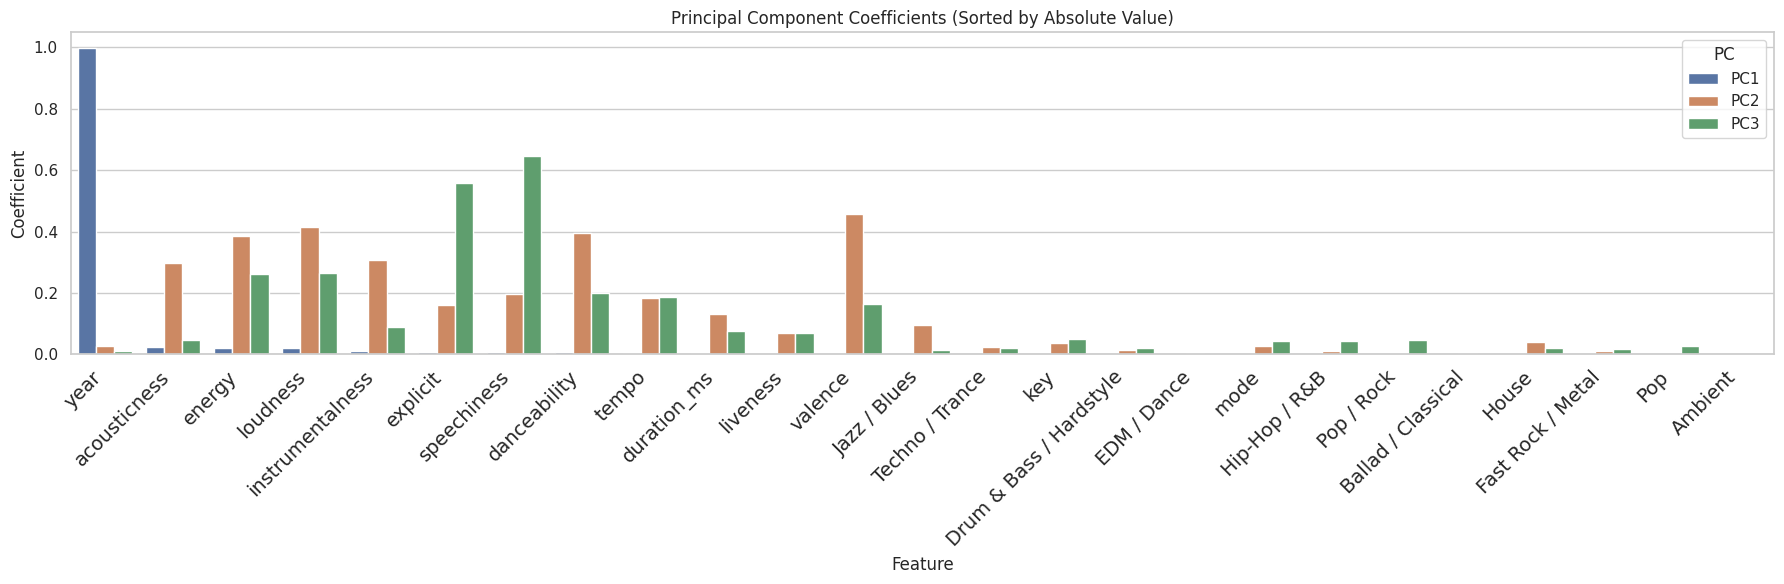

pca.components_:
[[-1.92848707e-03 -2.48309428e-02  6.05665463e-03  3.60415794e-03
   2.14721665e-02  8.04521922e-03 -9.09368691e-03 -1.15892720e-03
  -2.01017648e-03  1.94839560e-02 -4.89450744e-04 -7.38468498e-03
   5.72401063e-03  9.99120555e-01 -0.00000000e+00 -1.14693053e-04
   9.90520408e-04 -5.64821579e-04  6.14280196e-05 -2.29024763e-04
   6.54519659e-05 -1.72534552e-03 -3.58153472e-06 -1.40611965e-04
   1.66067803e-03]
 [ 4.55845084e-01 -2.97009418e-01  3.94568242e-01 -1.30765876e-01
   3.84659515e-01  1.59778975e-01 -3.07400380e-01  3.67161314e-02
   6.97168337e-02  4.14148510e-01 -2.65825344e-02  1.96510020e-01
   1.83186928e-01 -2.85019443e-02  0.00000000e+00 -3.30750696e-03
   1.47152832e-02 -5.15567316e-03  9.11890976e-03  1.04744747e-02
   3.86908976e-02 -9.59194384e-02  1.82620747e-03  4.41325543e-03
   2.51435904e-02]
 [-1.63404048e-01  4.68423366e-02  2.01001867e-01 -7.51963979e-02
  -2.62076971e-01  5.58668064e-01 -9.05085499e-02 -5.13100732e-02
   6.84277496e-02 -2.

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Assuming X is your Pandas DataFrame and pca is your fitted PCA object

# Get feature names
feature_names = X.columns

# Extract coefficients for the first three PCs
pc_coefficients = pca.components_[:3]

# Create a DataFrame for Seaborn plotting
plot_data = []
for i, pc in enumerate(pc_coefficients):
    abs_coef = np.abs(pc)
    sorted_indices = np.argsort(abs_coef)[::-1]
    top_features = feature_names[sorted_indices]
    top_coef = abs_coef[sorted_indices]

    for feature, coef in zip(top_features, top_coef):
        plot_data.append({'Feature': feature, 'Coefficient': coef, 'PC': f'PC{i+1}'})

plot_df = pd.DataFrame(plot_data)

# Plot using Seaborn
plt.figure(figsize=(18, 6))  # Adjust figure size as needed
sns.barplot(x='Feature', y='Coefficient', hue='PC', data=plot_df)
plt.title('Principal Component Coefficients (Sorted by Absolute Value)')
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.tight_layout()
plt.show()

# Optionally, you can still examine the components:
print("pca.components_:")
print(pca.components_)

In [ ]:
'''#Format Playlist as a table
from tabulate import tabulate

# Sample DataFrame (Replace this with your actual DataFrame)


# Selecting the desired rows and columns
df_playlist = df_pop_rock.iloc[20000:21400].drop(columns=['popularity_cat_kmeans_2','popularity_category','valence',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'Ambient',
 'Ballad / Classical',
 'Drum & Bass / Hardstyle',
 'EDM / Dance',
 'Fast Rock / Metal',
 'Hip-Hop / R&B',
 'House',
 'Jazz / Blues',
 'Pop',
 'Pop / Rock',
 'Techno / Trance',
 'popularity_category',
 'popularity_cat_kmeans_2',])

# Reset index so that it appears properly in the table
df_playlist.reset_index(inplace=True)

# Convert DataFrame to fancy table
print(tabulate(df_playlist, headers='keys', tablefmt='fancy_grid'))'''

In [ ]:
'''#Building table for nneihbor presentation

df_pop_rock.loc[[0,18,31,17,32],['name','artists','genre','popularity']]
#Format Suggestion as a  table
from tabulate import tabulate

# Sample DataFrame (Replace this with your actual DataFrame)


# Selecting the desired rows and columns
df_suggestions = df.loc[[1,3,2,5,0],['name','artists','genre','popularity']]

# Reset index so that it appears properly in the table
df_suggestions.reset_index(inplace=True)

# Convert DataFrame to fancy table
print(tabulate(df_suggestions, headers='keys', tablefmt='fancy_grid'))'''